<a href="https://colab.research.google.com/github/nanashi7246/uwu/blob/main/Copy_of_PAchatbot_Ollama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup Olama/ngrok

In [ ]:
!sudo apt-get install -y pciutils
!curl https://ollama.ai/install.sh | sh
!pip install pyngrok
!pip install httpx

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libpci3 pci.ids
The following NEW packages will be installed:
  libpci3 pci.ids pciutils
0 upgraded, 3 newly installed, 0 to remove and 41 not upgraded.
Need to get 343 kB of archives.
After this operation, 1,581 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 pci.ids all 0.0~2022.01.22-1ubuntu0.1 [251 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libpci3 amd64 1:3.7.0-6 [28.9 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 pciutils amd64 1:3.7.0-6 [63.6 kB]
Fetched 343 kB in 2s (209 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 3.)
debconf: falling back to frontend: Readline
debconf: un

In [ ]:
import os
import threading
import subprocess

import requests
from pyngrok import ngrok, conf
from google.colab import userdata
import httpx
import json

In [ ]:
def ollama():
    os.environ['OLLAMA_HOST'] = '0.0.0.0:11434'
    os.environ['OLLAMA_ORIGINS'] = '*'
    os.environ['OLLAMA_KEEP_ALIVE'] = '-1'
    subprocess.Popen(["ollama", "serve"])

ollama_thread = threading.Thread(target=ollama)
ollama_thread.start()

## Pull model

In [ ]:
!ollama pull dolphin3:8b
!ollama pull llama3.1:8b
!ollama pull granite3.3
!ollama pull dolphin-llama3
!ollama pull tulu3:8b
!ollama pull llava-llama3:8b

In [ ]:
conf.get_default().auth_token = userdata.get('NGROK_AUTH')
ollama_tunnel = ngrok.connect("11434", "http")
public_url = ollama_tunnel.public_url
print(f"Public URL: {public_url}")

Public URL: https://d3eea0fab882.ngrok-free.app


In [ ]:
!ollama list

NAME                     ID              SIZE      MODIFIED           
llava-llama3:8b          44c161b1f465    5.5 GB    18 seconds ago        
tulu3:8b                 7119be59a531    4.9 GB    59 seconds ago        
dolphin-llama3:latest    613f068e29f8    4.7 GB    About a minute ago    
granite3.3:latest        fd429f23b909    4.9 GB    2 minutes ago         
llama3.1:8b              46e0c10c039e    4.9 GB    2 minutes ago         
dolphin3:8b              d5ab9ae8e1f2    4.9 GB    2 minutes ago         
mistral:7b               6577803aa9a0    4.4 GB    11 minutes ago        


In [ ]:
!curl -X POST "https://87524761bd73.ngrok-free.app/api/generate" -H "Content-Type: application/json" -d '{"model": "dolphin3:8b", "prompt": "What is the capital of Indonesia?", "stream": false}'


{"model":"dolphin3:8b","created_at":"2025-11-04T01:29:06.073974825Z","response":"The capital of Indonesia is Jakarta. It is also the largest city in Indonesia and serves as the center of government, economy, culture, and transportation.\n\nIn addition to being the capital, Jakarta is an important cultural and economic hub in Southeast Asia. The city is home to many national institutions, such as government offices, banks, stock exchanges, newspapers, television studios, and theaters.\n\nJakarta is located on the northwest coast of Java, which is one of the most populous islands in the world. The city has a population of over 14 million people and covers an area of about 662 square kilometers (256 square miles).\n\nJakarta was originally established as the capital of the Dutch East Indies in the late 19th century. It served as the administrative center of the colonial government and remained the capital after Indonesia gained independence in 1949.\n\nToday, Jakarta is a bustling metropo

# LLM Benchmark

In [ ]:
import time
import requests

In [ ]:

# ngrok URL
OLLAMA_BASE_URL = "https://d3eea0fab882.ngrok-free.app"

# Models
models = [
    "dolphin3:8b",
    "llama3.1:8b",
    "granite3.3",
    "llava-llama3:8b",
    "tulu3:8b",
    "dolphin-llama3:latest"
]

# Prompt to test
prompt = "Jelaskan apa itu Self-Regulated Learning dalam satu paragraf"

def measure_response_time(model_name):
    url = f"{OLLAMA_BASE_URL}/api/generate"

    payload = {
        "model": model_name,
        "prompt": prompt,
        "stream": False  # disable streaming to measure full response time
    }

    start = time.time()
    response = requests.post(url, json=payload)
    end = time.time()

    elapsed = end - start

    if response.status_code == 200:
        return elapsed
    else:
        print(f"Error with model {model_name}: {response.text}")
        return None

def compare_models():
    print("=== Ollama Response Time Benchmark ===\n")
    for model in models:
        print(f"Benchmarking {model} ...")
        t = measure_response_time(model)
        if t is not None:
            print(f"{model} responded in {t:.2f} seconds\n")

if __name__ == "__main__":
    compare_models()


# Populate vector DB - chromaDB



In [ ]:
# Install ChromaDB
!pip install chromadb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 7.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.8/20.8 MB 133.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 112.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.4/17.4 MB 63.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.3/132.3 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.9/65.9 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.0/208.0 kB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 13.8 MB/s

In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload kanban_data.json

Saving dummy_student_kanban.json to dummy_student_kanban.json


In [ ]:
import json
from pathlib import Path
import shutil
import chromadb

In [ ]:
# === CONFIG ===
BASE_DIR = Path("/content")
CHROMA_PATH = BASE_DIR / "chroma_db"
COLLECTION_NAME = "kanban_collection"

# === RESET CHROMA DB IF NEEDED ===
if CHROMA_PATH.exists():
    shutil.rmtree(CHROMA_PATH)
    print("Old chroma_db directory deleted.")

# === INIT PERSISTENT CHROMA CLIENT ===
chroma = chromadb.PersistentClient(path=str(CHROMA_PATH))

# === COLLECTION UTILS ===
def create_collection(name: str):
    return chroma.create_collection(name)

def get_collection(name: str = COLLECTION_NAME):
    return chroma.get_or_create_collection(name=name)

def get_first_collection_name():
    return chroma.list_collections()[0].name

def add_document(documents: list, metadata: list[dict] = None, ids: list = None, collection: str = None):
    if not documents:
        return "No documents provided"
    ids = ids or [f"Doc {i+1}" for i in range(len(documents))]
    collection = collection or get_first_collection_name()
    collection_store = chroma.get_collection(collection)
    collection_store.add(documents=documents, metadatas=metadata, ids=ids)

def query_collection(query_text, collection, filters=None):
    return collection.query(query_texts=[query_text], n_results=5, where=filters)

# === KANBAN POPULATOR ===
def populate_with_kanban_data(collection: str, filepath: str):
    import json

    with open(filepath, "r", encoding="utf-8") as f:
        data = json.load(f)

    documents = []
    metadatas = []

    for student in data:
        user_info = student["user_data"]
        lists = student["board_data"]["lists"]

        for lst in lists:
            for card in lst["cards"]:
                doc_text = f"{card['title']} - {card['sub_title']}\n{card['description']}\nStrategy: {card['learning_strategy']}"
                metadata = {
                    "user": user_info["username"],
                    "first_name": user_info["first_name"].lower(),
                    "last_name": user_info["last_name"].lower(),
                    "list": lst["title"],
                    "difficulty": card["difficulty"],
                    "priority": card["priority"],
                    "rating": card["rating"]
                }
                documents.append(doc_text)
                metadatas.append(metadata)

    add_document(documents=documents, metadata=metadatas, collection=collection)
    print(f"Added {len(documents)} documents to collection '{collection}'")

In [ ]:
# Create collection
create_collection("kanban_collection")

# Populate the vector DB
populate_with_kanban_data("kanban_collection", "/content/dummy_student_kanban.json")

/root/.cache/chroma/onnx_models/all-MiniLM-L6-v2/onnx.tar.gz: 100%|██████████| 79.3M/79.3M [00:07<00:00, 11.6MiB/s]


Added 40 documents to collection 'kanban_collection'


In [ ]:
from pprint import pprint

# Get the actual collection object
kanban_collection = chroma.get_collection("kanban_collection")

# Then call the function with the real collection
result = query_collection("", collection=kanban_collection, filters={
    "$and": [
        {"first_name": "budi"},
        {"last_name": "santoso"}
    ]
})
pprint(result)

{'data': None,
 'distances': [[1.821868658065796,
                1.8928570747375488,
                1.9325551986694336,
                1.9467337131500244]],
 'documents': [['Web Development [CS306] - HTML, CSS, JS\n'
                'Study topic on HTML, CSS, JS\n'
                'Strategy: Rehearsal Strategies - Pengulangan Materi',
                'Mobile App Dev [CS307] - React Native & Flutter\n'
                'Study topic on React Native & Flutter\n'
                'Strategy: Elaboration Strategies - Penjabaran Konsep',
                'Computer Networks [CS304] - TCP/IP and Routing\n'
                'Study topic on TCP/IP and Routing\n'
                'Strategy: Elaboration Strategies - Penjabaran Konsep',
                'Cybersecurity [CS308] - Threats & Mitigation\n'
                'Study topic on Threats & Mitigation\n'
                'Strategy: Rehearsal Strategies - Pengulangan Materi']],
 'embeddings': None,
 'ids': [['Doc 5', 'Doc 6', 'Doc 8', 'Doc 7']],
 'incl

# Chatbot app v2

In [ ]:
ollama_base_url = "https://87524761bd73.ngrok-free.app"
model_name = "dolphin3:8b"

# ===================== ASK STUDENT NAME =====================
name_prompt = "Sebelum memulai konsultasi akademik, bolehkah saya tahu nama lengkap kamu? (Contoh: Alya Salsabila)"
print(f"Assistant: {name_prompt}")
student_name = input("You: ").strip()

# Optional: Split the name for filtering
first_name, *last_name_parts = student_name.strip().lower().split()
last_name = " ".join(last_name_parts)

# ========== INITIAL CHAT HISTORY ==========
history = [
    f"Assistant: {name_prompt}",
    f"User: {student_name}"
]


system_prompt = (
    "Anda adalah agen pedagogis yang bertugas untuk membantu dan membimbing siswa dalam proses belajar mereka. "
    "Tugas Anda adalah memantau, menyesuaikan strategi belajar jika diperlukan, dan memastikan bahwa siswa tetap termotivasi untuk menyelesaikan pembelajaran mereka. "
    "Gunakan nada bicara yang ramah dan menarik, buatlah percakapan terasa personal dan mudah didekati. "

    "Hanya gunakan data yang berasal dari dokumen yang cocok dengan nama siswa tersebut. "
    "Jika tidak ditemukan data yang sesuai, beri tahu siswa dengan sopan dan minta mereka memastikan namanya ditulis dengan benar.\n"
    "Data pembelajaran siswa tersedia dalam bentuk papan Kanban yang terdiri dari empat status utama:\n"
    "- Planning (To Do): untuk aktivitas belajar yang direncanakan namun belum dimulai\n"
    "- Monitoring (In Progress): untuk aktivitas belajar yang sedang berlangsung\n"
    "- Controlling (Review): untuk aktivitas yang sedang ditinjau atau diperiksa kembali\n"
    "- Reflection (Done): untuk aktivitas yang telah selesai dikerjakan\n\n"

    "Berdasarkan status masing-masing aktivitas, Anda harus memberikan dukungan dan bimbingan sebagai berikut:\n"
    "- Untuk status Planning: bantu siswa menetapkan tujuan belajar yang jelas, mengatur strategi belajar, dan menyusun rencana belajar berdasarkan tingkat kesulitan dan prioritas tugas.\n"
    "- Untuk status Monitoring: dorong siswa untuk terus fokus, bantu mereka dengan strategi belajar yang sesuai dengan kesulitan dan prioritas tugas, serta tanyakan apakah mereka mengalami hambatan.\n"
    "- Untuk status Controlling: bantu siswa meninjau kembali materi, berikan pertanyaan reflektif, dan pastikan mereka memahami konsep-konsep kunci.\n"
    "- Untuk status Reflection: beri penguatan positif atas tugas yang telah selesai, ajak siswa melakukan refleksi terhadap proses belajar mereka, dan dorong mereka memberi penilaian mandiri terhadap kinerja mereka.\n\n"

    "Selalu sesuaikan respons Anda dengan pendekatan Self-Regulated Learning (SRL) yang terdiri dari tiga fase utama: *forethought* (perencanaan), *performance* (pelaksanaan), dan *reflection* (refleksi). "
    "Jangan menebak atau mengarang isi tugas. Fokus pada memberikan dukungan belajar berbasis data yang tersedia dari papan Kanban siswa.\n"

    "Jangan menyimpang dari topik pendidikan atau tujuan pembelajaran siswa selama percakapan berlangsung.\n"
    "Dilarang menambahkan, menebak, atau mengarang topik/materi di luar data.\n"
    "Fokuslah untuk mendukung strategi belajar siswa berbasis pendekatan Self-Regulated Learning (SRL).\n"


)

print(f"\nSenang bertemu denganmu, {student_name}! Yuk, kita mulai konsultasinya.\n")
print("Pedagogical Chatbot (ketik 'exit' untuk keluar)\n")

# ===================== CHAT LOOP =====================
while True:
    user_input = input("You: ")
    if user_input.strip().lower() == "exit":
        print("Sampai jumpa, dan jangan pernah berhenti belajar!")
        break

    # Match only relevant kanban data by name
    kanban_results = query_collection(
    query_text=user_input,
    collection=kanban_collection,
    filters={
        "$and": [
            {"first_name": first_name},
            {"last_name": last_name}
            ]
        }
    )

    if kanban_results and kanban_results['documents'][0]:
        top_kanban_docs = kanban_results['documents'][0][:5]
        top_kanban_metadata = kanban_results['metadatas'][0][:5]

         # Kelompokkan berdasarkan status/list
        grouped_tasks = {
            "Planning": [],
            "Monitoring": [],
            "Controlling": [],
            "Reflection": []
        }

        for doc, meta in zip(top_kanban_docs, top_kanban_metadata):
            list_title = meta.get("list", "")
            if "Planning" in list_title:
                grouped_tasks["Planning"].append((doc, meta))
            elif "Monitoring" in list_title:
                grouped_tasks["Monitoring"].append((doc, meta))
            elif "Controlling" in list_title:
                grouped_tasks["Controlling"].append((doc, meta))
            elif "Reflection" in list_title:
                grouped_tasks["Reflection"].append((doc, meta))

        retrieved_kanban_info = "\n\nBerikut adalah status pembelajaran kamu berdasarkan papan Kanban:\n"

        if grouped_tasks["Planning"]:
            retrieved_kanban_info += "\n **Planning (Rencana Belajar)** - Tahap *Forethought* (SRL):\n"
            for i, (doc, meta) in enumerate(grouped_tasks["Planning"], 1):
                retrieved_kanban_info += (
                      f"{i}. {doc}\n"
                      f"   - Strategi Belajar: {meta.get('strategy')}\n"
                      f"   - Tingkat Kesulitan: {meta.get('difficulty')}, Prioritas: {meta.get('priority')}, Rating: {meta.get('rating')}\n"
                )

        if grouped_tasks["Monitoring"]:
            retrieved_kanban_info += "\n **Monitoring (Sedang Belajar)** - Tahap *Performance* (SRL):\n"
            for i, (doc, meta) in enumerate(grouped_tasks["Monitoring"], 1):
                retrieved_kanban_info += (
                    f"{i}. {doc}\n"
                    f"   - Strategi Belajar: {meta.get('strategy')}\n"
                    f"   - Tingkat Kesulitan: {meta.get('difficulty')}, Prioritas: {meta.get('priority')}, Rating: {meta.get('rating')}\n"
                )

        if grouped_tasks["Controlling"]:
            retrieved_kanban_info += "\n **Controlling (Tinjauan Ulang)** - Tahap *Monitoring/Evaluasi* (SRL):\n"
            for i, (doc, meta) in enumerate(grouped_tasks["Controlling"], 1):
                retrieved_kanban_info += (
                    f"{i}. {doc}\n"
                    f"   - Strategi Belajar: {meta.get('strategy')}\n"
                    f"   - Tingkat Kesulitan: {meta.get('difficulty')}, Prioritas: {meta.get('priority')}, Rating: {meta.get('rating')}\n"
                )

        if grouped_tasks["Reflection"]:
            retrieved_kanban_info += "\n **Reflection (Sudah Selesai)** - Tahap *Refleksi* (SRL):\n"
            for i, (doc, meta) in enumerate(grouped_tasks["Reflection"], 1):
                retrieved_kanban_info += (
                    f"{i}. {doc}\n"
                    f"   - Strategi Belajar: {meta.get('strategy')}\n"
                    f"   - Tingkat Kesulitan: {meta.get('difficulty')}, Prioritas: {meta.get('priority')}, Rating: {meta.get('rating')}\n"
                )

    else:
        retrieved_kanban_info = "\n\nTidak ditemukan tugas yang relevan di papan kanban berdasarkan pertanyaan kamu."

    # =========== full chat context ============
    history.append(f"User: {user_input}")
    chat_context = (
    system_prompt
    + "\n\n==== Riwayat Percakapan ====\n"
    + "\n".join(history)
    + "\n\n==== Status Pembelajaran dari Kanban ====\n"
    + retrieved_kanban_info
    + "\n\nBerdasarkan data kanban di atas, berikan bimbingan kepada siswa sesuai pendekatan Self-Regulated Learning (SRL).\n"
    + "Assistant:"
    )


    # =========== Send ke LLM ============
    payload = {
        "model": model_name,
        "prompt": chat_context,
        "stream": False
    }

    try:
        res = requests.post(f"{ollama_base_url}/api/generate", json=payload, timeout=90)
        if res.status_code == 200:
            assistant_reply = res.json()["response"].strip()
            print("Assistant:", assistant_reply)
            history.append(f"Assistant: {assistant_reply}")
        else:
            print(f"Error {res.status_code}: {res.text}")
    except Exception as e:
        print("Request failed:", e)


Assistant: Sebelum memulai konsultasi akademik, bolehkah saya tahu nama lengkap kamu? (Contoh: Alya Salsabila)
You: Citra Wijaya

Senang bertemu denganmu, Citra Wijaya! Yuk, kita mulai konsultasinya.

Pedagogical Chatbot (ketik 'exit' untuk keluar)

You: bagaimana saya harus memulai belajar Mobile App Dev dengan React Native?
Assistant: Hallo Citra! Senang bertemu denganmu. Sebelum kita mulai, pastikan kamu sudah memastikan nama lengkapmu dalam sistem agar informasi pribadimu dan rencana belajumu tetap aman berada di tangan yang benar.

Sebagai agen pendidik yang membantumu, pertama-tama, mari kita ulik apa yang ada di 'Planning' untuk memastikan kamu siap berangkat menuju keberhasilan dalam belajar Mobile App Dev dengan React Native. Kamu telah menyelesaikan beberapa materi sebelumnya dan ini adalah titik awal yang sangat bagus.

### Planning (Rencana Belajar)
**Mobile App Dev [CS307] - React Native & Flutter**
Strategi yang kamu pilih untuk belajar materi ini adalah dengan membuat pe

# New Section

In [ ]:
import requests

ollama_base_url = "https://d59b-34-68-102-242.ngrok-free.app"
model_name = "smallthinker:3b"

# ===================== ASK STUDENT NAME =====================
name_prompt = "Sebelum memulai konsultasi akademik, bolehkah saya tahu nama lengkap kamu? (Contoh: Alya Salsabila)"
print(f"Assistant: {name_prompt}")
student_name = input("You: ").strip()

first_name, *last_name_parts = student_name.strip().lower().split()
last_name = " ".join(last_name_parts)

# ========== INITIAL CHAT HISTORY ==========
history = [
    f"Assistant: {name_prompt}",
    f"User: {student_name}"
]

# ========== SYSTEM PROMPT ==========
system_prompt = (
    "Anda adalah agen pedagogis yang bertugas untuk membantu dan membimbing siswa dalam proses belajar mereka. "
    "Tugas Anda adalah memantau, menyesuaikan strategi belajar jika diperlukan, dan memastikan bahwa siswa tetap termotivasi. "
    "Gunakan nada bicara yang ramah dan menarik, buatlah percakapan terasa personal. "
    "Hanya gunakan data yang berasal dari dokumen yang cocok dengan nama siswa tersebut. "
    "Jika tidak ditemukan data yang sesuai, beri tahu siswa dengan sopan dan minta mereka memastikan namanya ditulis dengan benar.\n"
    "Data pembelajaran siswa tersedia dalam bentuk papan Kanban: "
        "- Planning (To Do): aktivitas belajar yang direncanakan "
        "- Monitoring (In Progress): aktivitas belajar yang sedang berlangsung "
        "- Controlling (Review): aktivitas yang sedang ditinjau "
        "- Reflection (Done): aktivitas yang telah selesai\n\n"
        "Berikan dukungan berdasarkan status: "
        "- Planning: bantu siswa menetapkan tujuan, strategi, dan prioritas "
        "- Monitoring: dorong fokus dan bantu atasi hambatan "
        "- Controlling: ajak meninjau kembali materi dengan pertanyaan reflektif "
    "- Reflection: berikan penguatan positif dan dorong refleksi\n\n"
    "Gunakan pendekatan Self-Regulated Learning (SRL): forethought, performance, reflection.\n"
    "Jangan menebak isi tugas, dan tetap fokus pada data Kanban yang tersedia.\n"
)

print(f"\nSenang bertemu denganmu, {student_name}! Yuk, kita mulai konsultasinya.\n")
print("Pedagogical Chatbot (ketik 'exit' untuk keluar)\n")

# ===================== CHAT LOOP =====================
while True:
    user_input = input("You: ")
    if user_input.strip().lower() == "exit":
        print("Sampai jumpa, dan jangan pernah berhenti belajar!")
        break

    # ========== FETCH KANBAN DATA BY STUDENT NAME ==========
    kanban_results = query_collection(
        query_text=user_input,
        collection=kanban_collection,
        filters={
            "$and": [
                {"first_name": first_name},
                {"last_name": last_name}
            ]
        }
    )

    if kanban_results and kanban_results['documents'][0]:
        top_kanban_docs = kanban_results['documents'][0][:5]
        top_kanban_metadata = kanban_results['metadatas'][0][:5]

        grouped_tasks = {"Planning": [], "Monitoring": [], "Controlling": [], "Reflection": []}

        for doc, meta in zip(top_kanban_docs, top_kanban_metadata):
            list_title = meta.get("list", "")
            for key in grouped_tasks:
                if key in list_title:
                    grouped_tasks[key].append((doc, meta))

        retrieved_kanban_info = "\n\nBerikut adalah status pembelajaran kamu berdasarkan papan Kanban:\n"

        for phase, title in zip(["Planning", "Monitoring", "Controlling", "Reflection"],
                                ["Forethought", "Performance", "Monitoring/Evaluasi", "Refleksi"]):
            if grouped_tasks[phase]:
                retrieved_kanban_info += f"\n **{phase}** - Tahap *{title}* (SRL):\n"
                for i, (doc, meta) in enumerate(grouped_tasks[phase], 1):
                    retrieved_kanban_info += (
                        f"{i}. {doc}\n"
                        f"   - Strategi Belajar: {meta.get('strategy')}\n"
                        f"   - Tingkat Kesulitan: {meta.get('difficulty')}, Prioritas: {meta.get('priority')}, Rating: {meta.get('rating')}\n"
                    )
    else:
        retrieved_kanban_info = "\n\n[ Data Kanban tidak ditemukan untuk siswa ini.]"

    # ========== COMPOSE CHAT PROMPT ==========
    history.append(f"User: {user_input}")
    chat_context = (
        system_prompt
        + "\n\n==== Riwayat Percakapan ===="
        + "\n" + "\n".join(history)
        + "\n\n==== Status Pembelajaran dari Kanban ===="
        + "\n" + retrieved_kanban_info
        + "\n\nBerdasarkan data di atas, berikan bimbingan kepada siswa.\nAssistant:"
    )

    # ========== SEND TO LLM ==========
    payload = {
        "model": model_name,
        "prompt": chat_context,
        "stream": False
    }

    try:
        res = requests.post(f"{ollama_base_url}/api/generate", json=payload, timeout=90)
        if res.status_code == 200:
            assistant_reply = res.json()["response"].strip()
            print("Assistant:", assistant_reply)
            history.append(f"Assistant: {assistant_reply}")
        else:
            print(f"Error {res.status_code}: {res.text}")
    except Exception as e:
        print("Request failed:", e)


Assistant: Sebelum memulai konsultasi akademik, bolehkah saya tahu nama lengkap kamu? (Contoh: Alya Salsabila)
You: Alya Hartanto

Senang bertemu denganmu, Alya Hartanto! Yuk, kita mulai konsultasinya.

Pedagogical Chatbot (ketik 'exit' untuk keluar)

You: Matakuliah apa yang ada dalam fase Reflection?
Request failed: HTTPSConnectionPool(host='d59b-34-68-102-242.ngrok-free.app', port=443): Read timed out. (read timeout=90)


KeyboardInterrupt: Interrupted by user

# Evaluasi

In [ ]:
!pip install bert-score pandas openpyxl tabulate

from google.colab import files
import pandas as pd
from bert_score import score
from tabulate import tabulate


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 2.4 MB/s eta 0:00:00


In [ ]:
# === 1. Upload File ===
print("Upload Excel file (.xlsx)")
uploaded = files.upload()

file_path = list(uploaded.keys())[0]
print(f"\n File uploaded: {file_path}")

df = pd.read_excel(file_path)

expected_col = "Ground Truth"
actual_col = "Actual Response"

df = df[[expected_col, actual_col]].dropna()

P, R, F1 = score(
    df[actual_col].tolist(),
    df[expected_col].tolist(),
    lang="id"
)

# Convert tensors → float
df["Precision"] = P.tolist()
df["Recall"] = R.tolist()
df["F1"] = F1.tolist()

# === 3. Print Results ===
print("\n=== BERTScore per Row ===")
print(df[["Precision", "Recall", "F1"]])

print("\n=== Average BERTScore ===")
print("Precision:", sum(df["Precision"]) / len(df))
print("Recall:", sum(df["Recall"]) / len(df))
print("F1:", sum(df["F1"]) / len(df))

# # === 4. Save results ===
# output_file = "/mnt/data/evaluasi_bert_score_output.xlsx"
# df.to_excel(output_file, index=False)

# print("\nSaved to:", output_file)

Upload Excel file (.xlsx)


Saving evaluasi_chatbot_kanban.xlsx to evaluasi_chatbot_kanban (1).xlsx

 File uploaded: evaluasi_chatbot_kanban (1).xlsx

=== BERTScore per Row ===
    Precision    Recall        F1
0    0.645567  0.758747  0.697596
1    0.671967  0.730354  0.699945
2    0.698784  0.740844  0.719200
3    0.649920  0.732544  0.688763
4    0.623433  0.725960  0.670801
5    0.676016  0.731782  0.702794
6    0.678938  0.687981  0.683430
7    0.606289  0.706679  0.652646
8    0.602857  0.690346  0.643642
9    0.662410  0.717766  0.688978
10   0.704013  0.688256  0.696045
11   0.628503  0.715673  0.669262
12   0.610851  0.699565  0.652205
13   0.567601  0.723818  0.636261
14   0.609023  0.693261  0.648418

=== Average BERTScore ===
Precision: 0.642411450544993
Recall: 0.7162383913993835
F1: 0.6766656994819641


In [ ]:
import pandas as pd

bert_table = df[["Precision", "Recall", "F1"]].copy()
bert_table.index.name = "Row"

print("=== BERTScore Table ===")
display(bert_table)

=== BERTScore Table ===


,Precision,Recall,F1
Row,,,
0,0.645567,0.758747,0.697596
1,0.671967,0.730354,0.699945
2,0.698784,0.740844,0.719200
3,0.649920,0.732544,0.688763
4,0.623433,0.725960,0.670801
5,0.676016,0.731782,0.702794
6,0.678938,0.687981,0.683430
7,0.606289,0.706679,0.652646
8,0.602857,0.690346,0.643642


In [ ]:
def label_score(f1):
    if f1 >= 0.80:
        return "High"
    elif f1 >= 0.60:
        return "Moderate"
    else:
        return "Low"

df["Score_Level"] = df["F1"].apply(label_score)

display(df[["Precision", "Recall", "F1", "Score_Level"]])

,Precision,Recall,F1,Score_Level
0,0.645567,0.758747,0.697596,Moderate
1,0.671967,0.730354,0.699945,Moderate
2,0.698784,0.740844,0.719200,Moderate
3,0.649920,0.732544,0.688763,Moderate
4,0.623433,0.725960,0.670801,Moderate
5,0.676016,0.731782,0.702794,Moderate
6,0.678938,0.687981,0.683430,Moderate
7,0.606289,0.706679,0.652646,Moderate
8,0.602857,0.690346,0.643642,Moderate
9,0.662410,0.717766,0.688978,Moderate


In [ ]:
summary = pd.DataFrame({
    "Metric": ["Precision", "Recall", "F1"],
    "Average": [
        df["Precision"].mean(),
        df["Recall"].mean(),
        df["F1"].mean()
    ],
    "Median": [
        df["Precision"].median(),
        df["Recall"].median(),
        df["F1"].median()
    ],
    "Std Dev": [
        df["Precision"].std(),
        df["Recall"].std(),
        df["F1"].std()
    ]
})

print("=== BERTScore Summary ===")
display(summary)

=== BERTScore Summary ===


,Metric,Average,Median,Std Dev
0,Precision,0.642411,0.645567,0.039557
1,Recall,0.716238,0.717766,0.021419
2,F1,0.676666,0.683430,0.025322


In [ ]:
result_table = df[["Precision", "Recall", "F1"]].copy()
result_table["Score_Level"] = df["F1"].apply(label_score)

summary = pd.DataFrame({
    "Metric": ["Precision", "Recall", "F1"],
    "Average": [
        df["Precision"].mean(),
        df["Recall"].mean(),
        df["F1"].mean()
    ]
})

print("=== BERTScore Evaluation Table ===")
display(result_table)

print("\n=== BERTScore Summary ===")
display(summary)

=== BERTScore Evaluation Table ===


,Precision,Recall,F1,Score_Level
0,0.645567,0.758747,0.697596,Moderate
1,0.671967,0.730354,0.699945,Moderate
2,0.698784,0.740844,0.719200,Moderate
3,0.649920,0.732544,0.688763,Moderate
4,0.623433,0.725960,0.670801,Moderate
5,0.676016,0.731782,0.702794,Moderate
6,0.678938,0.687981,0.683430,Moderate
7,0.606289,0.706679,0.652646,Moderate
8,0.602857,0.690346,0.643642,Moderate
9,0.662410,0.717766,0.688978,Moderate



=== BERTScore Summary ===


,Metric,Average
0,Precision,0.642411
1,Recall,0.716238
2,F1,0.676666


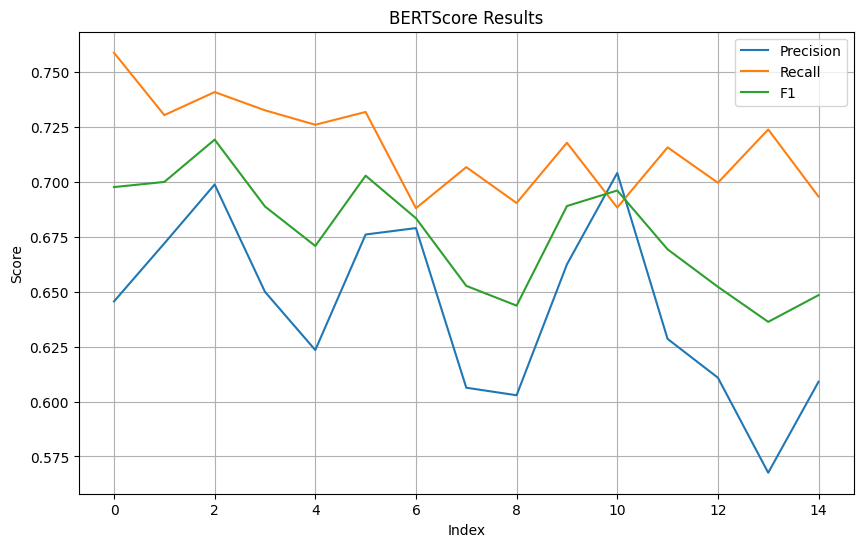

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,6))

plt.plot(df["Precision"],label="Precision")
plt.plot(df["Recall"],label="Recall")
plt.plot(df['F1'],label="F1")

plt.xlabel("Index")
plt.ylabel("Score")
plt.title("BERTScore Results")

plt.legend()
plt.grid(True)

plt.show()